<a href="https://colab.research.google.com/github/Jang54K/-/blob/main/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [10]:
with open('./sample_data/sample.txt', 'r') as f:
  docs = f.readlines()
for id, doc in enumerate(docs):
  print('[{}] : {}...'.format(id, doc[:30]))

[0] : BTS, also known as the Bangtan...
[1] : [5] The septet—consisting of m...
[2] : Originally a hip hop group, th...
[3] : Their lyrics, often focused on...
[4] : Their work also often referenc...
[5] : After debuting in 2013 with th...
[6] : The group's second Korean stud...
[7] : By 2017, BTS crossed into the ...
[8] : They became the first Korean g...
[9] : BTS became one of the few grou...
[10] : In 2020, BTS became the first ...
[11] : Their follow-up releases "Sava...
[12] : Having sold over 20 million al...
[13] : They are the first Asian and n...
[14] : Featured on Time's internation...
[15] : The group's numerous accolades...
[16] : Outside of music, they partner...


In [11]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(docs)
print('type of tfidf_matrix {}'.format(type(tfidf_matrix)))
print('shape of tfidf_matrix {}'.format(tfidf_matrix.shape))

type of tfidf_matrix <class 'scipy.sparse.csr.csr_matrix'>
shape of tfidf_matrix (17, 279)


In [15]:
import numpy as np
def tfidf_rank(tfidf_matrix):
    rank = []
    avg, stddev = 0.0, 0.0
    #문서 별 tfidf 가중치의 합 계산 : (문서id, 가중치 합)
    for idx, tfidf in enumerate(tfidf_matrix):
        rank.append((idx, tfidf.sum()))

    #가중치의 합이 높은 문서 순으로 정렬    
    rank.sort(key=lambda x : x[1], reverse=True)

    #tfidf의 평균과 표준편차 계산
    tfidf_sum = [tfidf.sum() for tfidf in tfidf_matrix]
    avg = np.mean(tfidf_sum)
    stddev = np.std(tfidf_sum)
    return rank, avg, stddev

rank, avg, stddev = tfidf_rank(tfidf_matrix)

print(rank[:2])
print('avg = {}, stddev = {}'.format(avg, stddev))

#랭크가 높은 문서 2개의 원문을 추출하여 rank_doc에 저장 후 출력
rank_doc = [docs[doc_id[0]] for doc_id in rank[:2]]
print(rank_doc)

[(13, 6.693423095412076), (16, 6.186613095039844)]
avg = 4.853519357129592, stddev = 0.8320478309229976
["They are the first Asian and non-English speaking act to be named International Federation of the Phonographic Industry (IFPI) Global Recording Artist of the Year (2020), to chart on Billboard's Top Touring Artists of the 2010s (placing at number 45), and to headline and sell out Wembley Stadium and Rose Bowl Stadium (Love Yourself World Tour in 2019).\n", 'Outside of music, they partnered with UNICEF to establish the Love Myself anti-violence campaign, addressed three United Nations General Assemblies, and became the youngest ever recipients of the Order of Cultural Merit from the President of South Korea due to their contributions in spreading Korean culture and language.']


In [16]:
df =  pd.DataFrame(tfidf_matrix.toarray(), columns = tfidf.get_feature_names())
print(df.head(5))

   100   20  200      2010  2010s      2013  2014  2016  2017  2018  ...  \
0  0.0  0.0  0.0  0.231975    0.0  0.202557   0.0   0.0   0.0   0.0  ...   
1  0.0  0.0  0.0  0.000000    0.0  0.000000   0.0   0.0   0.0   0.0  ...   
2  0.0  0.0  0.0  0.000000    0.0  0.000000   0.0   0.0   0.0   0.0  ...   
3  0.0  0.0  0.0  0.000000    0.0  0.000000   0.0   0.0   0.0   0.0  ...   
4  0.0  0.0  0.0  0.000000    0.0  0.000000   0.0   0.0   0.0   0.0  ...   

   wings  with      work  world    writes  year  years  youngest  yourself  \
0    0.0   0.0  0.000000    0.0  0.000000   0.0    0.0       0.0       0.0   
1    0.0   0.0  0.000000    0.0  0.224235   0.0    0.0       0.0       0.0   
2    0.0   0.0  0.000000    0.0  0.000000   0.0    0.0       0.0       0.0   
3    0.0   0.0  0.000000    0.0  0.000000   0.0    0.0       0.0       0.0   
4    0.0   0.0  0.286997    0.0  0.000000   0.0    0.0       0.0       0.0   

      youth  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.184249  
4  0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
tfidf2 = TfidfVectorizer(stop_words='english')
tfidf_matrix2 = tfidf2.fit_transform(docs)
print('shap of tfidf_matrix2 = {}'.format(tfidf_matrix2.shape))

df =  pd.DataFrame(tfidf_matrix2.toarray(), columns = tfidf2.get_feature_names_out())
result = df.sum()
resul = result.sort_values(ascending=False)
print(result[:10])

shap of tfidf_matrix2 = (17, 222)
100      0.415966
20       0.209182
200      0.471498
2010     0.280382
2010s    0.175592
2013     0.438703
2014     0.222036
2016     0.345672
2017     0.419606
2018     0.483493
dtype: float64


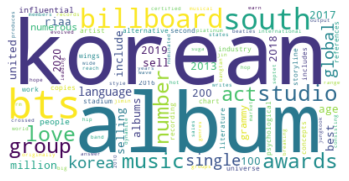

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(result)

plt.imshow(Cloud, interpolation='bilinear')
plt.axis('off')
plt.show()